# **Women Cloth Review Prediction **

In [43]:
#importing  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/YBIFoundation/ProjectHub-MachineLearning/main/Women%20Clothing%20E-Commerce%20Review.csv")

In [45]:
df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clothing ID        23486 non-null  int64 
 1   Age                23486 non-null  int64 
 2   Title              19676 non-null  object
 3   Review             22641 non-null  object
 4   Rating             23486 non-null  int64 
 5   Recommended        23486 non-null  int64 
 6   Positive Feedback  23486 non-null  int64 
 7   Division           23472 non-null  object
 8   Department         23472 non-null  object
 9   Category           23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [47]:
df.shape

(23486, 10)

In [48]:
df.isna().sum()

,0
Clothing ID,0
Age,0
Title,3810
Review,845
Rating,0
Recommended,0
Positive Feedback,0
Division,14
Department,14
Category,14


In [49]:
df[df['Review']==""]=np.NaN
df['Review'].fillna("No review is given", inplace=True)
df.isna().sum()

,0
Clothing ID,0
Age,0
Title,3810
Review,0
Rating,0
Recommended,0
Positive Feedback,0
Division,14
Department,14
Category,14


In [50]:
df['Review'].head()

,Review
0,Absolutely wonderful - silky and sexy and comfortable
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite."
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c"
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!


# **Defining Target Variable (y) and Feature Variables (X)**

In [51]:
x = df['Review']
y = df['Rating']
df['Rating'].value_counts()

,count
Rating,
5,13131
4,5077
3,2871
2,1565
1,842


In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.7, stratify = y, random_state=2529)

# **Get Feature Text Conversion to Tokens**

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase = True, analyzer='word', ngram_range=(2,3), stop_words = 'english', max_features=5000)
x_train = cv.fit_transform(x_train)
cv.get_feature_names_out()

array(['00 regular', '00p 0p', '10 12', ..., 'yellow color', 'yoga pants',
       'zipper little'], dtype=object)

In [54]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
x_test = cv.fit_transform(x_test)
cv.get_feature_names_out()

array(['0p fit', '10 12', '10 dress', ..., 'years old', 'yellow color',
       'yoga pants'], dtype=object)

In [56]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **Get Model Train**

In [57]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [58]:
#GET MODEL PREDICTION
y_pred = model.predict(x_test)
y_pred.shape

(16441,)

In [59]:
y_pred

array([4, 1, 5, ..., 5, 3, 2])

In [60]:
#GET PROBABILITY OF EACH CLASS
model.predict_proba(x_test)

array([[0.08056772, 0.05439919, 0.23616423, 0.57932615, 0.04954271],
       [0.67716558, 0.10245637, 0.01307022, 0.02908642, 0.17822141],
       [0.21821845, 0.03176734, 0.0474073 , 0.04773565, 0.65487127],
       ...,
       [0.01186793, 0.0153884 , 0.00988551, 0.01576021, 0.94709794],
       [0.06838784, 0.21728786, 0.41849112, 0.17710153, 0.11873164],
       [0.0377656 , 0.60499014, 0.29217287, 0.02044755, 0.04462384]])

In [61]:
#GER MODEL EVALUATION
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))

[[  47   46   91  102  303]
 [ 130   94  186  199  487]
 [ 235  209  318  378  870]
 [ 362  366  443  733 1650]
 [ 931  869 1028 1712 4652]]


In [62]:
print(confusion_matrix(y_test,y_pred))

[[  47   46   91  102  303]
 [ 130   94  186  199  487]
 [ 235  209  318  378  870]
 [ 362  366  443  733 1650]
 [ 931  869 1028 1712 4652]]


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.03      0.08      0.04       589
           2       0.06      0.09      0.07      1096
           3       0.15      0.16      0.16      2010
           4       0.23      0.21      0.22      3554
           5       0.58      0.51      0.54      9192

    accuracy                           0.36     16441
   macro avg       0.21      0.21      0.21     16441
weighted avg       0.40      0.36      0.38     16441



In [64]:
#CATEGORIZE RATINGS AS "0" and "1"
df.replace({'Rating':{1:0,2:0,3:0,4:1,5:1}},inplace = True)

In [65]:
y = df['Rating']
x = df['Review']

In [66]:
# TRAIN_TEST SPLIT
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.7, stratify = y, random_state=2529)


In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase = True, analyzer='word', ngram_range=(2,3), stop_words = 'english', max_features=5000)

In [68]:
x_train = cv.fit_transform(x_train)
x_test = cv.fit_transform(x_test)

In [69]:
#Retrain the Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [70]:
y_pred = model.predict(x_test)
y_pred.shape

(16441,)

In [71]:
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
#MODEL EVALUATION
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))

In [72]:
print(confusion_matrix(y_test,y_pred))

[[1160 2535]
 [3095 9651]]


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.27      0.31      0.29      3695
           1       0.79      0.76      0.77     12746

    accuracy                           0.66     16441
   macro avg       0.53      0.54      0.53     16441
weighted avg       0.68      0.66      0.67     16441



In [75]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.31      0.19      0.23      3695
           1       0.79      0.88      0.83     12746

    accuracy                           0.72     16441
   macro avg       0.55      0.53      0.53     16441
weighted avg       0.68      0.72      0.70     16441



In [78]:
print(confusion_matrix(y_test,y_pred))

[[  686  3009]
 [ 1525 11221]]


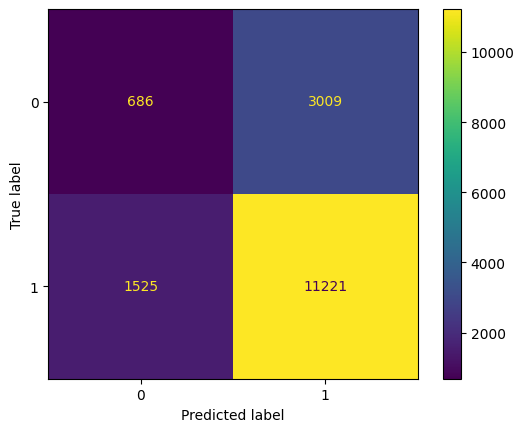

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()